## Machine Learning: Introductory Examples

#### *16 October 2019*
#### *DATA 1010*

## Linear Regression

To estimate $\boldsymbol{\beta} = [\beta_0,\beta_1]$ from the $n$ observations $\{(x_i,y_i)\}_{i=1}^n$, we minimize the empirical mean squared error (also known as the **residual sum of squares**): 

$$
\operatorname{RSS}(\boldsymbol{\beta}) = \sum_{i=1}^n (y_i - \beta_0 - \beta_1 x_i)^2.   
$$

In [ ]:
using Plots, StatsBase, Distributions

## Problem 1

Use vector differentiation to find the value of $\boldsymbol{\beta}$ which minimizes $\operatorname{RSS}(\boldsymbol{\beta})$. 

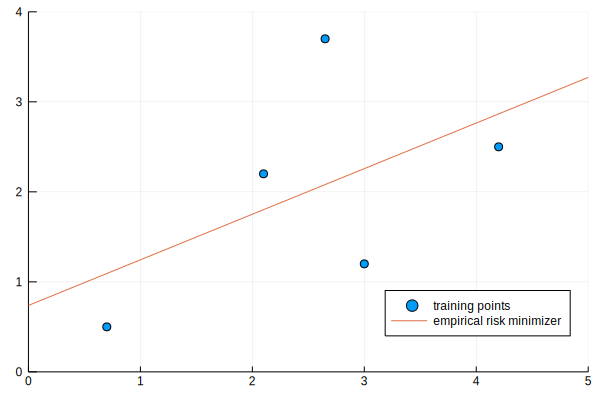

In [ ]:
x = [2.1, 3, 0.7, 4.2, 2.65]
y = [2.2, 1.2, 0.5, 2.5, 3.7]
scatter(x,y, label = "training points", ylims = (0,4), xlims = (0,5), legend = :bottomright)
β̂ = [ones(5) x] \ y
plot!(0:5, x -> β̂'*[1,x], label = "empirical risk minimizer")


*Solution*. 

## Problem 2

Find the polynomial of degree $d$ which minimizes the residual sum of squares. Using the data given above, plot the best-fit polynomial for several values of $d$.

## Problem 3

In this problem, we'll apply some ideas from statistics to linear regression. 

Suppose that $X$ is a length-$p$ random vector and $Y$ and $\epsilon$ are random variables with the property that $Y = \boldsymbol{\beta} X + \epsilon$, where $\boldsymbol{\beta}$ is a length-$p$ vector of constants and $\epsilon$ is normally distributed with mean $\boldsymbol{0}$ and covariance matrix $\sigma^2 I$.

Given $n$ observations $(X_1, Y_1), \ldots (X_n, Y_n)$, we define 

$$
\hat{\boldsymbol{\beta}} = \left(\mathbf{X}' \mathbf{X}\right)^{-1} \mathbf{X}' \mathbf{y}, 
$$

and 

$$
\hat{\mathbf{y}} =  \mathbf{X} \hat{\beta}
$$

(a) Propose an estimator for $\sigma^2$. 

(b) You can work out that the conditional covariance of $\widehat{\boldsymbol{\beta}}$ given $X$ is $\sigma^2\mathbf{C}$, where $\mathbf{C} = (\mathbf{X}'\mathbf{X})^{-1}$. Therefore, we can estimate the standard error of $\widehat{\beta}_i$ as $s\sqrt{C_{i,i}}$. Furthermore, we have 

$$
\frac{\hat{\beta}_{i}-\beta_{i}}{s_{\hat{\beta}_{i}}} \sim t_{n-p}
$$

Use this fact to conduct a hypothesis test with the null hypothesis $\beta_i = 0$, with the alternative hypothesis that $\beta_i \neq 0$. Experiment with different values of $i$. Show that you usually reject when $\beta_i \neq 0$ and fail to reject when $\beta_i = 0$.

In [ ]:
n = 100
p = 10
X = rand(n, p)
β = [0, 1, 0, 0, -2, 0, -1, 0, 0, 0]
ϵ = 2.1*randn(n)
Y = X * β .+ ϵ;

---

## Quadratic Discriminant Analysis

In this section, we'll take a look at a classification problem. 

## Problem 4

Suppose that each email is associated with a continuous spam score, and you want to distinguish spam emails from legitimate emails based on this score. Suppose that the spam score of a spam message is normally distributed with mean 21 and standard deviation 3, while the spam score of a legitimate message is normally distributed with mean 12 and standard deviation 2. Suppose further that only 20% of emails are legitimate.

If your goal is to maximize your probability of correctly classifying each message, in which spam scores should result in a prediction of spam?

In [ ]:
plot(0:0.1:30, x -> 0.8pdf(Normal(21,3),x), fillrange = 0, fillopacity = 0.5, legend = :topleft,
     label = "non-spam", xlabel = "spam score", ylabel = "density", fontfamily = "Palatino")
plot!(0:0.1:30, x -> 0.2pdf(Normal(12,2),x), fillrange = 0, fillopacity = 0.5, label = "spam")

## Problem 5

<img src="flower-points.svg" style="float: right;">

Given a flower randomly selected from a field, let $X_1$ be its petal width in centimeters, $X_2$ its petal length in centimeters, and $Y\in\{\mathrm{R},\mathrm{G},\mathrm{B}\}$ its color. Let

$$
\begin{align*}
\boldsymbol{\mu}_{\mathrm{R}} &=
\left[\begin{smallmatrix} 9 \\ 5 \end{smallmatrix}\right]
  &\quad \boldsymbol{\mu}_{\mathrm{G}} &=
  \left[\begin{smallmatrix}4 \\ 10 \end{smallmatrix}\right]
    &\quad \boldsymbol{\mu}_{\mathrm{B}} &= \left[\begin{smallmatrix}7 \\ 9 \end{smallmatrix}\right] \\
A_{\mathrm{R}} &= \left[\begin{smallmatrix}1.5 & -1 \\ 0 & \hphantom{-}1
              \\ \end{smallmatrix}\right] &\quad 
A_{\mathrm{G}} &= \left[\begin{smallmatrix}0.5 & 0.25 \\ 0 & 0.5
              \\ \end{smallmatrix}\right] &\quad 
A_{\mathrm{B}} &= \left[\begin{smallmatrix}2 & 0 \\ 0 & 2
              \\ \end{smallmatrix}\right]. 
\end{align*}
$$

Suppose that the joint distribution of $X_1, X_2,$ and $Y$ is defined as follows: for any $A\subset \mathbb{R}^2$ and color $c \in \{\mathrm{R},\mathrm{G},\mathrm{B}\}$, we have

$$
  \mathbb{P}(A \times \{c\}) = p_c\int_{\mathbb{R}^2} f_c(x_1,x_2) \operatorname{d} x_1 
  \operatorname{d} x_2, 
$$

where $(p_R,p_G,p_B) = (1/3,1/6,1/2)$ and $f_c$ is the multivariate normal density with mean $\mu_c$ and covariance matrix $A_cA_c'$. In other words, we can sample from the joint distribution of of $X_1, X_2,$ and $Y$ by sampling $Y$ from {R, G, B} with probabilities 1/3, 1/6, and 1/2, respectively, and then generate $(X_1, X_2)$ by calculating $A_Y Z + \mu_Y$, where $Z$ is a vector of two standard normal random variables which are independent and independent of $Y$. 

Three hundred observations from the distribution of $(X_1, X_2, Y)$ are
shown in the figure above.

Find the best predictor of $Y$ given $(X_1,X_2) = (x_1, x_2)$ (using the 0-1 loss function), and find a way to estimate that predictor using the given observations.  

In [ ]:
using Plots, StatsBase, Distributions
ps = Weights([1/3,1/6,1/2])
ps = Weights([0.0,0.1,0.9])
As = [[1.5 -1; 0 1],[1/2 1/4; 0 1/2], [2 0; 0 2]]
μs = [[9,5],[4,10],[7,9]]
Ns = [MvNormal(μ,A*A') for (μ,A) in zip(μs,As)]
plotlyjs()
plot(colorbar=false, fontfamily = "Palatino", size = (500,500))
for (c,N,p) in zip([:red, :green, :blue], Ns, ps)
    surface!(0:0.05:15, 0:0.05:15, (x,y) -> p*pdf(N, [x,y]), fillcolor = cgrad([:lightgray, c]))
end
current()

In [ ]:
using Random; Random.seed!(1234)
struct Flower
    X::Vector
    color::String
end
# density function for the normal distribution N
xs = 0:1/2^4:15
ys = 0:1/2^4:15
As = [[1.5 -1; 0 1],[1/2 1/4; 0 1/2], [2 0; 0 2]]
μs = [[9,5],[4,10],[7,9]]
Ns = [MvNormal(μ,A*A') for (μ,A) in zip(μs,As)]
p = Weights([1/3,1/6,1/2])
colors = ["red","green","blue"]
function randflower(μs,As)
    i = sample(p)
    Flower(As[i]*randn(2)+μs[i],colors[i])
end
flowers = [randflower(μs,As) for i=1:300];